In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
import numpy as np

# Load dataset
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
print(data['Class'].value_counts())


Class
0    284315
1       492
Name: count, dtype: int64


In [8]:
X = data.drop('Class', axis=1)
y = data['Class']

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [11]:
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = {0: class_weights[0], 1: class_weights[1]}
print(class_weights)


{0: np.float64(0.5008661206149896), 1: np.float64(289.14340101522845)}


In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [13]:
# Input dimension = number of features
input_dim = X_train.shape[1]

model = Sequential([
    Dense(64, input_dim=input_dim, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


c:\Users\KOMALIG\OneDrive\future dealer\OneDrive\Internship\Real Time Projects\Fraudulent Transaction Classifier\fraud_env\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,609 (18.00 KB)

 Trainable params: 4,609 (18.00 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Train with class weights
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=2048,
    class_weight=class_weights,
    verbose=1
)


Epoch 1/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5689 - loss: 760.4790 - val_accuracy: 0.0231 - val_loss: 20.7277
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5562 - loss: 291.5802 - val_accuracy: 0.9981 - val_loss: 0.2581
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5516 - loss: 123.8729 - val_accuracy: 0.0022 - val_loss: 65.7565
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5006 - loss: 86.3804 - val_accuracy: 0.9803 - val_loss: 0.2158
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5019 - loss: 41.5357 - val_accuracy: 0.9886 - val_loss: 0.0820
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5159 - loss: 24.9950 - val_accuracy: 0.0022 - val_loss: 34.4671
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4957 - loss: 21.9077 - val_accuracy: 0.0023 - val_loss: 6.0507
Epoch 8/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4822 - loss: 18.5722 - val_accuracy: 0.99

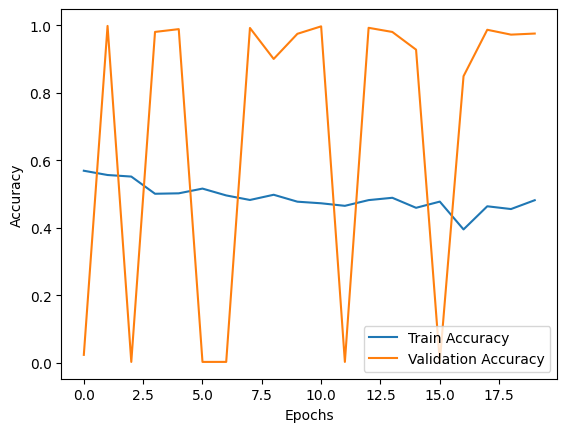

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [16]:
# Predict probabilities
y_pred_prob = model.predict(X_test)

# Convert probabilities to binary labels
y_pred = (y_pred_prob > 0.5).astype(int)


1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [17]:
from sklearn.metrics import classification_report, confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report (precision, recall, F1-score)
cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)


Confusion Matrix:
 [[55494  1370]
 [   93     5]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.00      0.05      0.01        98

    accuracy                           0.97     56962
   macro avg       0.50      0.51      0.50     56962
weighted avg       1.00      0.97      0.99     56962



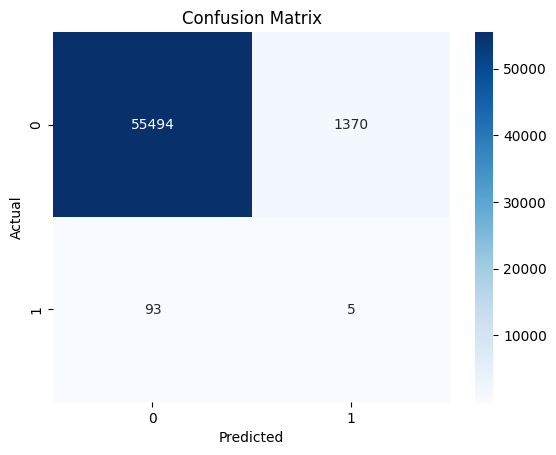

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [19]:
# Save trained model
model.save("fraud_model.h5")
print("Model saved successfully!")


Model saved successfully!


In [20]:
import joblib

# Save the StandardScaler
joblib.dump(scaler, "scaler.joblib")
print("Scaler saved successfully!")


Scaler saved successfully!


In [21]:
from tensorflow.keras.models import load_model

# Load model
loaded_model = load_model("fraud_model.h5")

# Load scaler
loaded_scaler = joblib.load("scaler.joblib")

print("Model and scaler loaded successfully!")


Model and scaler loaded successfully!
